In [8]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from toolbox import solve_bands, kpoints_to_xaxis
plt.rcParams.update({'font.size': 14})

---
## <font color="Blue">1. Example: single-band in a 1-D lattice<font>
<img src="./images/1.png" width="50%" align="left">

### Build Hamiltonian

In [9]:
H = {}
H[(0,0,0)] = np.array([
    [0],
])
H[(1,0,0)] = np.array([
    [-1],
])
H[(-1,0,0)] = np.array([
    [-1]
])

### Define k-path 

In [10]:
k1Arr = np.linspace([-1*pi, 0 ,0], [1*pi,0, 0], num=101) # G-X
kArr = np.r_[k1Arr]

### Solve and plot

Shape of bands: (101, 1)
Number of calculated k-points: 101
Number of bands: 1



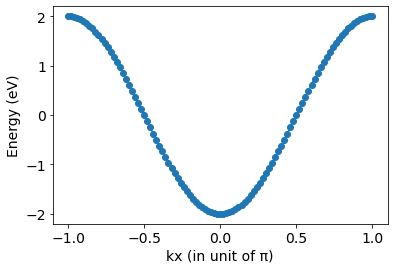

In [11]:
# solve bands
bands = solve_bands(H, kArr)
print(f'Shape of bands: {bands.shape}')
print(f'Number of calculated k-points: {bands.shape[0]}')
print(f'Number of bands: {bands.shape[1]}')
print()

# make x-axis for plotting
xArr = kArr[:,0]/pi

# plot bands
for band in bands.T:
    plt.plot(xArr, band, '-o')
plt.xlabel('kx (in unit of π)')
plt.ylabel('Energy (eV)')
plt.show()

---
## <font color="Blue">2. Example: single-band in a 2-D square lattice<font>
<img src="./images/2-1.png" width="40%" align="left">
<img src="./images/2-2.png" width="40%" align="left">

In [12]:
# Build Hamiltonian
H = {}
H[(0,0,0)] = np.array([
    [0],
])
H[(1,0,0)] = np.array([
    [-1],
])
H[(-1,0,0)] = np.array([
    [-1]
])
H[(0,1,0)] = np.array([
    [-1],
])
H[(0,-1,0)] = np.array([
    [-1]
])

# Define k-path 
sk = [
    ('G', [ 0, 0, 0]),
    ('X', [ 0,pi, 0]),
    ('M', [pi,pi, 0]),
    ('G', [ 0, 0 ,0]),
]
k1Arr = np.linspace([ 0, 0 ,0], [ 0,pi, 0], num=20) # G-X
k2Arr = np.linspace([ 0,pi, 0], [pi,pi, 0], num=20) # X-M
k3Arr = np.linspace([pi,pi, 0], [ 0, 0, 0], num=20) # M-G
kArr = np.r_[k1Arr, k2Arr, k3Arr]

Shape of bands: (60, 1)
Number of calculated k-points: 60
Number of bands: 1



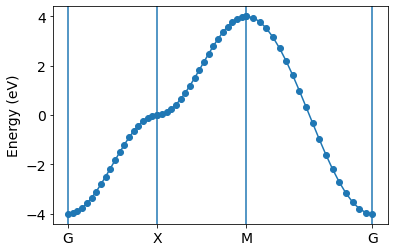

In [13]:
# solve bands
bands = solve_bands(H, kArr)
print(f'Shape of bands: {bands.shape}')
print(f'Number of calculated k-points: {bands.shape[0]}')
print(f'Number of bands: {bands.shape[1]}')
print()

# make x-axis for plotting
xArr = kpoints_to_xaxis(kArr)
hk_labels = [ s[0] for s in sk ]
hk_points = [ s[1] for s in sk ]
hk_xaxis = kpoints_to_xaxis(hk_points)

# plot bands
for band in bands.T:
    plt.plot(xArr, band, '-o')
for i, _ in enumerate(hk_labels):
    plt.axvline(hk_xaxis[i])
plt.ylabel('Energy (eV)')
plt.xticks(hk_xaxis, hk_labels)
plt.show()

---
## <font color="Blue">3. Example: graphene<font>
<img src="./images/3-1.png" width="40%" align="left">
<img src="./images/3-2.png" width="40%" align="left">

In [14]:
t = 2.8
H = {}
H[(0,0,0)] = np.array([
    [ 0,-t],
    [-t, 0],
])
H[(np.sqrt(3)/2,1/2,0)] = np.array([
    [ 0, 0],
    [-t, 0],
])
H[(np.sqrt(3)/2,-1/2,0)] = np.array([
    [ 0, 0],
    [-t, 0],
])
H[(-np.sqrt(3)/2,1/2,0)] = np.array([
    [ 0,-t],
    [ 0, 0],
])
H[(-np.sqrt(3)/2,-1/2,0)] = np.array([
    [ 0,-t],
    [ 0, 0],
])


k_G = [              0,     0,  0]
k_M = [  pi/np.sqrt(3),     pi, 0]
k_K = [2*pi/np.sqrt(3), 2/3*pi, 0]
sk = [
    ('G', k_G),
    ('M', k_M),
    ('K', k_K),
    ('G', k_G),
]
k1Arr = np.linspace(k_G, k_M, num=20)
k2Arr = np.linspace(k_M, k_K, num=20)
k3Arr = np.linspace(k_K, k_G, num=20)
kArr = np.r_[k1Arr, k2Arr, k3Arr]

Shape of bands: (60, 2)
Number of calculated k-points: 60
Number of bands: 2



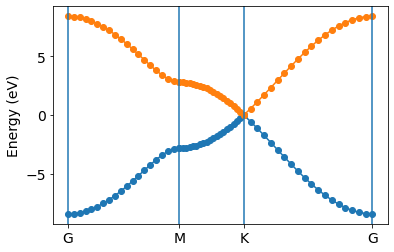

In [15]:
# solve bands
bands = solve_bands(H, kArr)
print(f'Shape of bands: {bands.shape}')
print(f'Number of calculated k-points: {bands.shape[0]}')
print(f'Number of bands: {bands.shape[1]}')
print()

# make x-axis for plotting
xArr = kpoints_to_xaxis(kArr)
hk_labels = [ s[0] for s in sk ]
hk_points = [ s[1] for s in sk ]
hk_xaxis = kpoints_to_xaxis(hk_points)

# plot bands
for band in bands.T:
    plt.plot(xArr, band, '-o')
for i, _ in enumerate(hk_labels):
    plt.axvline(hk_xaxis[i])
plt.ylabel('Energy (eV)')
plt.xticks(hk_xaxis, hk_labels)
plt.show()

---
## <font color="Blue">4. Example: single-band in a 3-D square lattice<font>
<img src="./images/4.png" width="40%" align="left">

In [16]:
H = {}
H[(0,0,0)] = np.array([
    [0],
])
H[(1,0,0)] = np.array([
    [-1],
])
H[(-1,0,0)] = np.array([
    [-1]
])
H[(0,1,0)] = np.array([
    [-1],
])
H[(0,-1,0)] = np.array([
    [-1]
])
H[(0,0,1)] = np.array([
    [-1],
])
H[(0,0,-1)] = np.array([
    [-1]
])


sk = [
    ('G', [ 0, 0, 0]),
    ('X', [ 0,pi, 0]),
    ('M', [pi,pi, 0]),
    ('G', [ 0, 0 ,0]),
    ('R', [pi,pi,pi]),
]
k1Arr = np.linspace([ 0, 0 ,0], [ 0,pi, 0], num=20) # G-X
k2Arr = np.linspace([ 0,pi, 0], [pi,pi, 0], num=20) # X-M
k3Arr = np.linspace([pi,pi, 0], [ 0, 0, 0], num=20) # M-G
k4Arr = np.linspace([ 0, 0, 0], [pi,pi,pi], num=20) # G-R
kArr = np.r_[k1Arr, k2Arr, k3Arr, k4Arr]

Shape of bands: (80, 1)
Number of calculated k-points: 80
Number of bands: 1



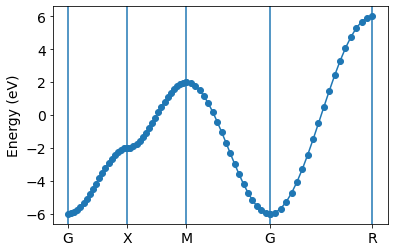

In [17]:
# solve bands
bands = solve_bands(H, kArr)
print(f'Shape of bands: {bands.shape}')
print(f'Number of calculated k-points: {bands.shape[0]}')
print(f'Number of bands: {bands.shape[1]}')
print()

# make x-axis for plotting
xArr = kpoints_to_xaxis(kArr)
hk_labels = [ s[0] for s in sk ]
hk_points = [ s[1] for s in sk ]
hk_xaxis = kpoints_to_xaxis(hk_points)

# plot bands
for band in bands.T:
    plt.plot(xArr, band, '-o')
for i, _ in enumerate(hk_labels):
    plt.axvline(hk_xaxis[i])
plt.ylabel('Energy (eV)')
plt.xticks(hk_xaxis, hk_labels)
plt.show()